# **Modeling and dynamics of an epidemic, COVID-19 with and without confinement - Case of Morocco -**



# 0. Modeling:

This project presents a mathematical model SIR (The acronym SIR refers to the three main compartments of the model: Susceptible (S), Infected (I), and Recovered or Removed (R)) aimed at analyzing the dynamics of Covid-19 spread while taking into account the impact of confinement on the susceptible population and the isolation of the infected population. 


One of the key parameters we evaluate is the basic reproduction number, \( R_0 \), which represents the average number of new cases generated by a typical infectious individual within a population entirely composed of susceptible individuals during its infectious period. This study specifically focuses on the context of Morocco using the mentioned model.

**The SIR Model:** \
The SIR model assumes that the total population remains constant, meaning that no births or deaths are taken into account. It uses differential equations to describe the rates of change of populations in each compartment based on parameters such as the disease transmission rate and the recovery rate. 

This model allows for the study of the spread dynamics of a disease, estimation of the impact of interventions (such as vaccination or confinement), and prediction of the epidemic's evolution in a given population.

We propose an extended SIR model that builds upon the classical Kermack and McKendrick model $[4, 5, 6, 1]$, taking into account the effect of confinement on both susceptible and infectious populations. Additionally, we assume that $0 ≤ α < 1$ and $0 ≤ δ < 1$ are the confinement rates of susceptibles and isolation rates of infectious individuals, respectively. Thus, the fraction of confined susceptibles (protected) is $αS$, while the fraction of susceptibles not confined is $(1 − α)S$, representing the fraction of susceptibles to be infected by the fraction of infectious individuals not confined $(1 − δ)I$ at an infection rate equal to $δ$. The fraction $δI$ is confined. Λ represents the birth rate density of susceptibles. The population in compartment $R$ includes individuals removed from the transmission chain, including those confined $(αS)$, those isolated $(δI)$, recovered individuals, and deceased individuals.

\begin{cases}
\frac{dS}{dt}= Λ- β(1-α)(1-δ)SI-αS \\
\
\frac{dI}{dt}= β(1-α)(1-δ)SI-γI-δI\\
\frac{dR}{dt}=γI+αS+δI \\
\
N=S+I+R= constante → si Λ=0\\
S(0) > 0 , I(0) > 0 , R(0) > 0\\
\end{cases}




In the first part, we will evaluate a system of equations without confinement.
\begin{cases}
\frac{dS}{dt}=- βSI\\
\frac{dI}{dt}=βSI - γI
\end{cases} 


And in the second part, we will examine the disease evolution with confinement.
\begin{cases}
\frac{dS}{dt}=Λ - β.(1-α).(1-δ).SI-αS\\
\frac{dI}{dt}= β.(1-α).(1-δ).SI - γI- δI
\end{cases} 

# 1. Theoretical Study (Dynamic System Module)

### **1. Disease Evolution Without Confinement:**

The study will be conducted on the system we have already defined for the case without confinement, with the same assumptions (we assume that confinement has not been declared yet, $α = δ = 0$, and we also assume that the number of births is negligible, $Λ = 0$):
\begin{cases}
\frac{dS}{dt}=- βSI\\
\frac{dI}{dt}=βSI - γI
\end{cases}
Based on epidemiological analyses and model adjustments to observed data on the disease evolution in Morocco, we take: $β = 0.17$ and $γ = 0.146$.

**• Study of Existence:**
By virtue of the Cauchy-Lipschitz theorem, we have the existence of a solution for the system; let's now study the equilibrium points.

**• Equilibrium Points and Their Stability:**
We have the system:
\begin{cases}
\frac{dS}{dt}=- 0.17 SI\\
\frac{dI}{dt}=0.17 SI - 0.146 I
\end{cases}

So the equilibrium points are: (0 ; 0) and (0 ; 0.86). Let's now study the stability of these two points:

We start by calculating the Jacobian matrix:


$ J =\begin{pmatrix}
-0.17I & -0.17S  \\
0.17I-0.146 & 0.17S-0.146  \\
\end{pmatrix} $
 








**For the equilibrium point (0 ; 0):** 


$ J(0,0) =\begin{pmatrix}
0 & 0  \\
-0.146 & -0.146  \\
\end{pmatrix} $ 



The eigenvalues of $ J(0,0) $ are the solutions to the characteristic equation $ \text{det}(J(0,0) - λI) = 0 $, where \( I \) is the identity matrix. 


By solving this equation, we obtain the following eigenvalues: \
$ λ_1 = 0 $


$λ_2 = -0.292  $

The eigenvalue \( λ_1 = 0 \) indicates marginal stability, and the eigenvalue \( λ_2 = -0.292 \) has a negative real part, indicating that the equilibrium point \( (0,0) \) is an unstable equilibrium point.

**For the equilibrium point (0 ; 0.86):** \\
$J(0,0.86) =\begin{pmatrix}
0 & -0.146  \\
0 & -0.146  \\
\end{pmatrix}$ \\
The eigenvalues of $J (0,0.86)$ are the solutions to the characteristic equation $det(J(0,0.86) - λI) = 0$, with $I$ the identity matrix.

By solving this equation, we obtain the following eigenvalues: 



$λ_1 = 0 $ 


$λ_2 = -0.146 $ 

Therefore, the equilibrium point $(0,0.86)$ is an unstable equilibrium point with marginal stability along the direction associated with the eigenvalue $λ_1 = 0$.

**Phase Portrait:** \\
We will now plot the phase portrait of the system to visualize the trajectories and behaviors of the variables in the \( (S, I) \) plane.

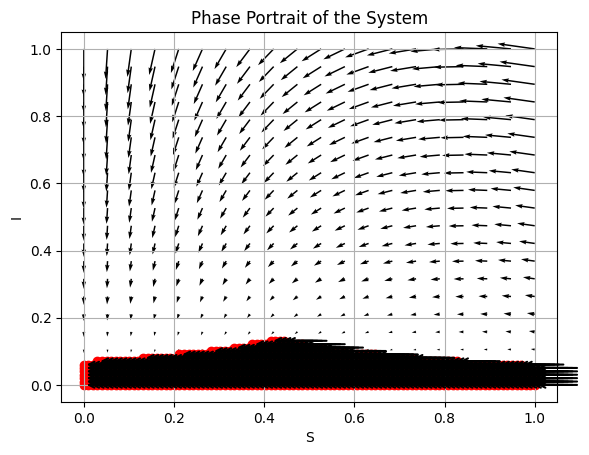

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the differential equations
def dS_dt(S, I):
    return -0.17 * S * I

def dI_dt(S, I):
    return 0.17 * S * I - 0.146 * I

# Definition of equilibrium points
def find_equilibrium():
    S_eq = []
    I_eq = []

    # Solving equations for dS_dt = 0 and dI_dt = 0
    for S in np.linspace(0, 1, 100):
        for I in np.linspace(0, 1, 100):
            if abs(dS_dt(S, I)) < 0.01 and abs(dI_dt(S, I)) < 0.01:
                S_eq.append(S)
                I_eq.append(I)

    return S_eq, I_eq

# Calculating equilibrium points
S_eq, I_eq = find_equilibrium()

# Range of values for S and I
S = np.linspace(0, 1, 20)
I = np.linspace(0, 1, 20)

# Creating grid of values
S, I = np.meshgrid(S, I)

# Calculating derivatives dS and dI on the grid
dS = dS_dt(S, I)
dI = dI_dt(S, I)

# Plotting phase portraits with arrows towards equilibrium points
plt.quiver(S, I, dS, dI)
plt.scatter(S_eq, I_eq, color='red')
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Portrait of the System')

# Adding arrows
for i in range(len(S_eq)):
    plt.annotate("", xy=(S_eq[i], I_eq[i]), xytext=(S_eq[i]+0.1, I_eq[i]), arrowprops=dict(arrowstyle="->", lw=1.5))

plt.grid()
plt.show()


### **2. Disease Evolution with Confinement:**

In this paragraph, we examine the model $ (1.1) $ with confinement parameters $ α > 0 $ and  $δ > 0$ . 
We focus on studying the SI system as the population of compartment \( R \) depends on populations $ S $ and $ I $, such that $ S $ and $ I $ are independent of $ R $. 
Let's assume $ Λ > 0 $ to account for new births during the epidemic. 
The initial system becomes:




\[
\begin{cases}
\frac{dS}{dt}=Λ - β.(1-α).(1-δ).SI-αS \\
\frac{dI}{dt}= β.(1-α).(1-δ).SI - γI- δI
\end{cases}
\]


Taking into account the dynamics of coronavirus propagation in Morocco with confinement, the values of \( β \) and \( γ \) have been chosen to model relatively intense virus transmission and an average recovery rate:
\( β = 1.25 \) and \( γ = 1 \).

**Point d'équilibre du système :** 
On résout ce système algébrique. on annule les dérivées de $S(t)$ et de $I(t)$ 


On constate deux cas : 

**Equilibrium point without disease:**
We have  $I(t) = 0 $ , $ \frac{dS}{dt}=0 $, $\frac{dI}{dt}=0$ 


$Λ-β(1-α)(1_δ).0.I- αS = 0$ 


⇒ $S=\frac{Λ}{α}$ 


Hence the equilibrium point is $E_0=(\frac{Λ}{α},0)$



**Equilibrium point with disease:** 

$ \frac{dS}{dt}=0 $, $\frac{dI}{dt}=0$ \\

\begin{cases}
Λ-β(1-α)(1_δ).S^{\ast}.I^{\ast} αS^{\ast} = 0 \\
β(1-α)(1-δ)S^{\ast}.I^{\ast} - αS^{\ast} - γI^{\ast} - δI^{\ast} = 0
\end{cases} \\

\begin{cases}
S^{\ast}=\frac{γ+δ}{β.(1-α).(1-δ)}\\ 
\\
I^{\ast}=\frac{Λ-α.S^{\ast}}{β.(1-α).(1-δ).S^{\ast}} = \frac{Λ-α.S^{\ast}}{γ+δ} 
\end{cases} \\

Therefore $E^{\ast}=(S^{\ast},I^{\ast})$ \\
$E^{\ast}$ est positif si $Λ-α.S^{\ast} > 0$ \\
⇒ $ Λ > \frac{α(γ+δ)}{β(1-α)(1-δ)} $ \\
\
⇒ $ \frac{γβ(1-α)(1-δ)}{γ+δ} > 1 $ \\
\
Let's define $R_0=\frac{γβ(1-α)(1-δ)}{γ+δ}$

We consider two cases: $R_0 < 1$ et $R_0 > 1$.

**First case: suppose $R_0  < 1$ , then:** 


$E^{\ast}$ is negative, so $E^{\ast}$ does not exist  
thus the equilibrium point without disease $E_0$ is the only equilibrium point of the system.

**Stability analysis of $E_0$ : ** \\


First, let's calculate the Jacobian:  


$J(E)=\begin{pmatrix}
\ - β(1- α)(1- δ)I-α &  -β(1- 𝛂)(1-δ)S \\
β(1-α)(1-δ)I & β(1-α)(1-δ)S-γ-δ \\
\end{pmatrix}$ \\
\
Let's calculate $J(E_0)$: \\
$J(E_0)=\begin{pmatrix}
\ -α & \frac{-β(1-α)(1-δ)𝚲}{α} \\
0 &  \frac{β(1-α)(1-δ)𝚲}{α} - γ -δ \\
\end{pmatrix}$ \\
The characteristic polynomial of this matrix:
det(λI-J($E_0$)) has solutions \\
 $λ_1=-α$ \\

 $λ_2 = \frac{β(1-α)𝚲}{α}-γ-δ $ \\
$λ_1<0$ et $λ_2<0$ \\
thus the equilibrium point $ E_0 $ is locally asymptotically stable.  

**Second case: suppose  $R_0>1$, then:** 


-It is evident that the equilibrium point without disease $E_0$ is unstable  

-For the equilibrium point with disease;  

let's calculate the Jacobian of $E^{\ast}$


$J(E^{\ast}) =\begin{pmatrix}
\ -β(1-α)(1-δ)I^{\ast}-α & -(γ+δ) \\
β(1-α^)(1-δ)I^{\ast} & 0 \\
\end{pmatrix}$   


Since $tr(J(E^{\ast})) < 0$ and $det(J(E^{\ast}))>0$ 



thus $E^{\ast}$ is a locally asymptotically stable equilibrium point.



**Phase Portrait:**  

In this section, we will plot the phase portrait of our system.

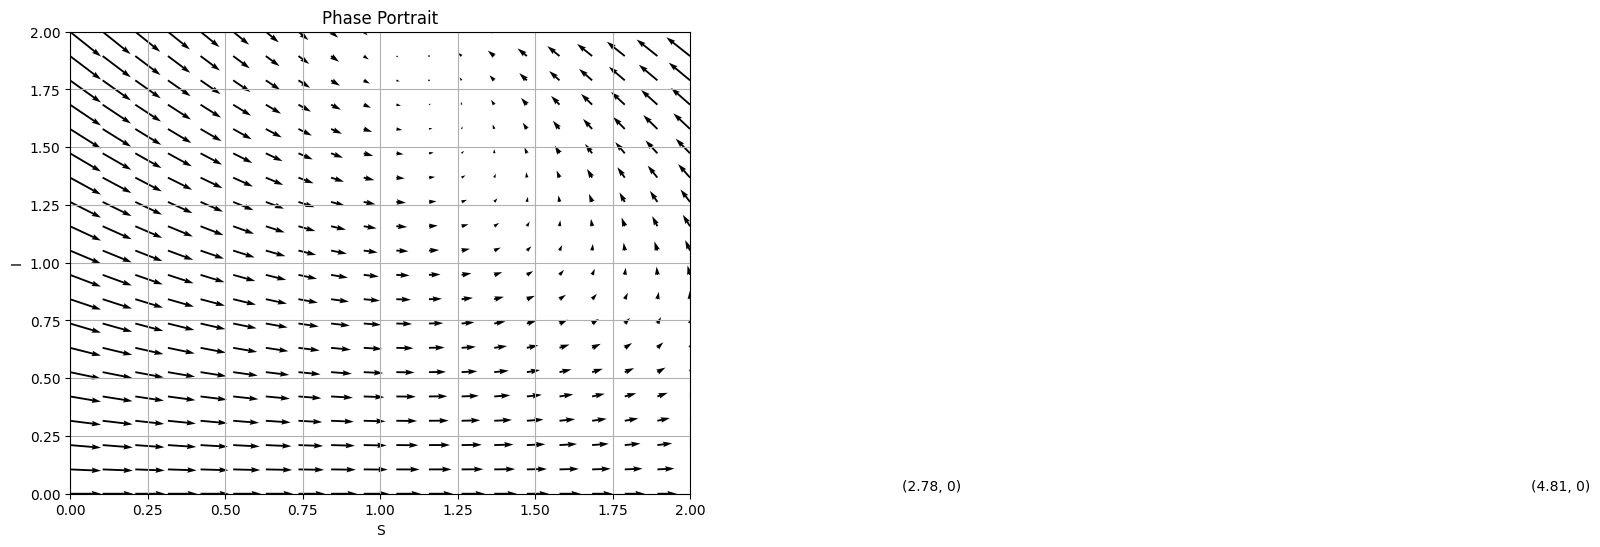

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
alpha = 0.2
beta = 0.5
gamma = 0.3
delta = 0.1
Ʌ = 1

# Define the differential equations of the system
def dS_dt(S, I):
    return Ʌ - beta * (1 - alpha) * (1 - delta) * S * I - alpha * S

def dI_dt(S, I):
    return beta * (1 - alpha) * (1 - delta) * S * I - gamma * I - delta * I

# Define the equilibrium points
equilibrium_points = [(Ʌ / (beta * (1 - alpha) * (1 - delta))), (Ʌ / (beta * (1 - alpha) * (1 - delta) * gamma + delta))]

# Define the function to calculate the derivatives of the variables
def derivatives(variables, t):
    S, I = variables
    dSdt = dS_dt(S, I)
    dIdt = dI_dt(S, I)
    return [dSdt, dIdt]

# Define values for the phase portrait grid
S_values = np.linspace(0, 2, 20)
I_values = np.linspace(0, 2, 20)

# Create the phase portrait grid
S_grid, I_grid = np.meshgrid(S_values, I_values)

# Calculate derivatives on the grid
dSdt_grid, dIdt_grid = derivatives([S_grid, I_grid], 0)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.quiver(S_grid, I_grid, dSdt_grid, dIdt_grid, scale=20)
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Portrait')
plt.grid()
plt.xlim([0, 2])
plt.ylim([0, 2])

# Plot equilibrium points
for point in equilibrium_points:
    plt.plot(point, 0, 'ro')
    plt.text(point, 0, f'({point:.2f}, 0)', ha='center', va='bottom')

# Show the plot
plt.show()


# 2. Numerical Analysis (Numerical Methods for Engineers Module)

The problem is formulated as follows:
\begin{cases}
\frac{dS}{dt}=Ʌ - β.(1-α).(1-δ).SI-α.S\\
     S(0)=N
\end{cases}


**For the explicit Euler scheme :**


Let $ h $ be the time step.



$ S(t_n+h)=S(t_n)+h.\dot{S}(t_n)
= S(t_n)+h.(Ʌ - β.(1-α).(1-δ).S(t_n)I-α.S(t_n))\\
= S(t_n).(Ʌ-hA-hα)+hɅ$ \\
with  $A= β.(1-α).(1-δ).I$


$S_1= S_0(1-hA-hα)+hɅ \\
S_2= S_1(1-hA-hα)+hɅ \\
S_2= S_0(1-hA-hα)^2 +hɅ(1-hA-hα)+ hɅ \\
S_3= S_0(1-hA-hα)^3 +hɅ(1-hA-hα)^2+ hɅ(1-hA-hα)+ hɅ \\ $

Then we find the following recursive expression:



$ S_n=S_0(1-hA-hα)^n + \sum_{k=0}^{n-1} hɅ(1-hA-hα)^k $ 


It's the explicit Euler Scheme.





We perturbe the initial condition $S_0$ with $S̃_0=S_0+ϵ$ 



$ S̃=(S_0+ϵ).(1-Ah-hα)^n + \sum_{k=0}^{n-1} hɅ(1-hA-hα)^k \\
= S_n + ϵ(1-hA-hα)^n $ \\


then $ | S̃_n - S_n |= ϵ|1-hA-hα|^n $ with $ ϵ > 0$ \\
The Euler scheme remains stable after perturbation of the initial data when \\ $|1- Ah - α h |^n < 1 $ \\
c-à-d $ 0 < h < \frac{2}{A+α} $ \\
To study the convergence of this scheme, we need to verify if the numerical solution $S_n$ converges to the exact solution $y$ as the step h tends to 0.


The error : $ ϵ=y-S_n $ \\
However, the explicit Euler scheme has first-order convergence, which means that $ ϵ(t)= 𝙾(h) $. Therefore, we can deduce that $ \lim_{h \to a} ϵ = 0 $.




Consequently, the scheme is convergent.











The stability condition allowed us to choose a value of $h = 1$.
The explicit Euler scheme can be represented as follows:

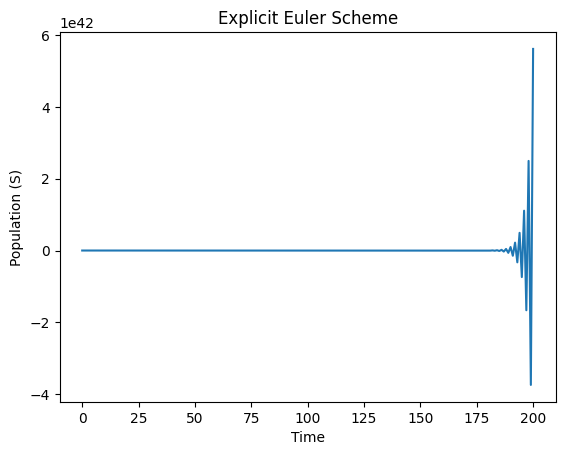

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicit(A, alpha, N, n, h, Ʌ):
    S = np.zeros(n+1)
    S[0] = N
    
    for k in range(n):
        S[k+1] = S[k] + h * (Ʌ - A*S[k] - alpha*S[k])
    
    return S

# System parameters
Ʌ = 1
A = 2
alpha = 0.5
N = 34000000
n = 200
h = 1

# Calculate the explicit Euler scheme
S = euler_explicit(A, alpha, N, n, h, Ʌ)

# Plot the explicit Euler scheme
t = np.arange(0, n+1) * h
plt.plot(t, S)
plt.xlabel('Time')
plt.ylabel('Population (S)')
plt.title('Explicit Euler Scheme')
plt.show()


**For the implicit Euler scheme:**

Let $h$ be the time step.




\begin{cases}
S(t_n+h)=S(t_n)+h(Ʌ - β.(1-α).(1-δ).SI-α.S) \\
     S(t_0)=N
\end{cases} 


⇒
\begin{cases}
(1+Ah+αh) S_{n+1} = S_n +hɅ \\
     S(t_0)=N
\end{cases} 



⇒ $ S_{n+1} = \frac{S_n}{1+Ah+αh} +\frac{hɅ}{1+Ah+αh} $



$ S_1 = \frac{S_0}{1+Ah+αh} +\frac{hɅ}{1+Ah+αh} $ 

$ S_2 = \frac{S_1}{1+Ah+αh} +\frac{hɅ}{1+Ah+αh} $ 


$ S_2 = \frac{S_0}{(1+Ah+αh)^2} +\frac{hɅ}{(1+Ah+αh)^2} +\frac{hɅ}{1+Ah+αh} $ 




This leads us to the recursive expression of the implicit scheme:


$ S_n = \frac{S_0}{(1+Ah+αh)^n} +∑_{k=1}^n \frac{hɅ}{(1+Ah+αh)^k} $ 


⇒
It's the implicit Euler scheme.




**Convergence Study:**

The objective is to verify if $S_n$ converges to the exact solution of the system as $h → 0$ .

We let $h$ tend to 0:

 

$\lim_{h \to 0} S_n = \lim_{h \to 0} \frac{S_0}{(1+Ah+αh)^n} +\lim_{h \to 0} ∑_{k=1}^n \frac{hɅ}{(1+Ah+αh)^k} $ 

$ = S_0 + 0 = S_0 $ 

As h tends to 0, the implicit Euler scheme converges to the initial value $S_0$.

We conclude that this scheme is convergent.







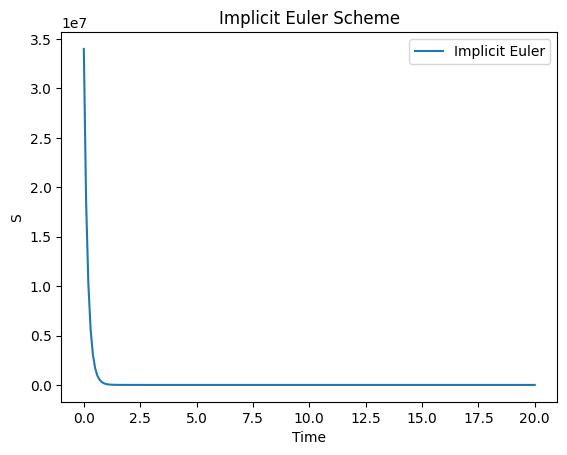

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 2
alpha = 0.5
N = 34000000
h = 0.1
n = 200
Ʌ = 1

# Define the function f(S) = 1 - AS - alpha*S
def f(S):
    return Ʌ - A*S - alpha*S

# Implicit Euler scheme
def euler_implicit(S0, h, n, Ʌ):
    S = [S0]  # List to store S values
    for i in range(1, n+1):
        S.append(S[i-1] / (1 + h*A + alpha*h) + h*f(S[i-1]))
    return S

# Calculate S values using the implicit Euler scheme
S_values = euler_implicit(N, h, n, Ʌ)

# Create the time vector
t = np.linspace(0, n*h, n+1)

# Plot the obtained solution
plt.plot(t, S_values, label='Implicit Euler')
plt.xlabel('Time')
plt.ylabel('S')
plt.title('Implicit Euler Scheme')
plt.legend()
plt.show()


### **We prefer to use the explicit scheme due to its superior accuracy. Explicit schemes offer precise control of accuracy by adjusting the time step. By increasing the number of iterations or reducing the time step, we can achieve more accurate results. This allows us to meet the specific requirements of the problem and obtain higher precision when needed. Additionally, the simplicity of implementing explicit schemes makes it easier to adjust the time step and manage accuracy. Therefore, considering the importance we place on result accuracy, we opt for the explicit scheme.**

# 3. Implementation (Code Python) 


In [ ]:
import numpy as np
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt

**The proposed algorithm for solving the system:**

In [ ]:
def euler_explicit_solver(A, alpha, N, n, h):
    S = np.zeros(n+1)
    S[0] = N
    
    for k in range(n):
        S[k+1] = S[k] + h * (1 - A*S[k] - alpha*S[k])
    
    return S


**to compare this method with the odeint function from the SciPy library**

In [13]:
def odeint_solver(A, alpha, N, t):
    def system(S, t):
        return Ʌ - A*S - alpha*S
    
    S0 = N
    S = odeint(system, S0, t)
    
    return S.flatten()

# System parameters
A = 2
alpha = 0.5
N = 34000000
n = 200
h = 0.1
Ʌ = 1

# Sampling time
t = np.arange(n+1) * h

# Solve with explicit Euler
start_time = time.time()
S_euler = euler_explicit_solver(A, alpha, N, n, h)
euler_time = time.time() - start_time

# Solve with odeint
start_time = time.time()
S_odeint = odeint_solver(A, alpha, N, t)
odeint_time = time.time() - start_time

# Compare results
error = np.abs(S_euler - S_odeint)

print("Maximum error:", np.max(error))
print("Computation time (Explicit Euler):", euler_time)
print("Computation time (odeint):", odeint_time)


TypeError: euler_explicit() missing 1 required positional argument: 'Ʌ'

## **Commentary:** 
In this script, we utilize the odeint function from the SciPy library to solve the differential system. We then compare the results obtained with both methods (explicit Euler and odeint) by calculating the maximum error between the two numerical solutions. Additionally, we measure the computation time for each method.



## **Graphical Comparison:** 
Subsequently, we plot the solutions obtained with the explicit Euler and odeint methods on the same graph. 
The solutions are plotted against time (t) and population (S).

In [14]:
# Plotting the solutions
plt.plot(t, S_euler, label='Explicit Euler')
plt.plot(t, S_odeint, label='odeint')
plt.xlabel('Time')
plt.ylabel('Population (S)')
plt.title('Comparison of Solutions: Explicit Euler vs odeint')
plt.legend()
plt.show()


NameError: name 'S_euler' is not defined

# 4. Discussion 


In summary, this project examines the role of population confinement and isolation of infected individuals in managing the spread of epidemics, with a particular focus on **Covid-19 in Morocco**. The study analyzes the impact of the basic reproduction number, a key factor in epidemic transmission. To address this issue, we compared the two periods, before and after confinement: the pre-confinement period marked by the emergence of local cases, and the post-confinement period (starting from March 20), characterized by the wider spread of the epidemic within the population.

The results demonstrate that during the initial phase, the cumulative number of infected individuals increases automatically. However, during the subsequent phase and thanks to the implementation of confinement and isolation measures, the transmission rate decreases compared to the initial phase. It is emphasized that the basic reproduction number is influenced by the rates of confinement and isolation. An increase in these rates leads to a decrease in the reproduction number below 1, indicating successful control of the epidemic, while lower rates lead to a reproduction number above 1, signifying continued disease spread.

**In conclusion, effective management of an epidemic relies on the ability to regulate confinement rates for the susceptible population and isolation for infected individuals.**